In [25]:
""" Import packages """

import pandas as pd
import numpy as np
import cv2

import seaborn as sns
sns.set()  # Setting seaborn as default style even if use only matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")  # To ignore warnings

# Help - Function

In [26]:
def plot_digits(data):
    """
    function used to plot the given data
    
    Args:
    ----
            data (pd.Series): String series represent images             
   
   Returns:
   -------  
            return subplots from 4 rows and 10 columns with figsize = (10, 4) 
    """
    fig, axes = plt.subplots(4, 10, figsize = (10, 4),
                             subplot_kw = {'xticks':[], 'yticks':[]},
                             gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap = 'binary', 
                  interpolation = 'nearest',
                  clim = (0, 16))


---

<center> <h1><B>Matrix Decomposition</B></h1> </center>

---

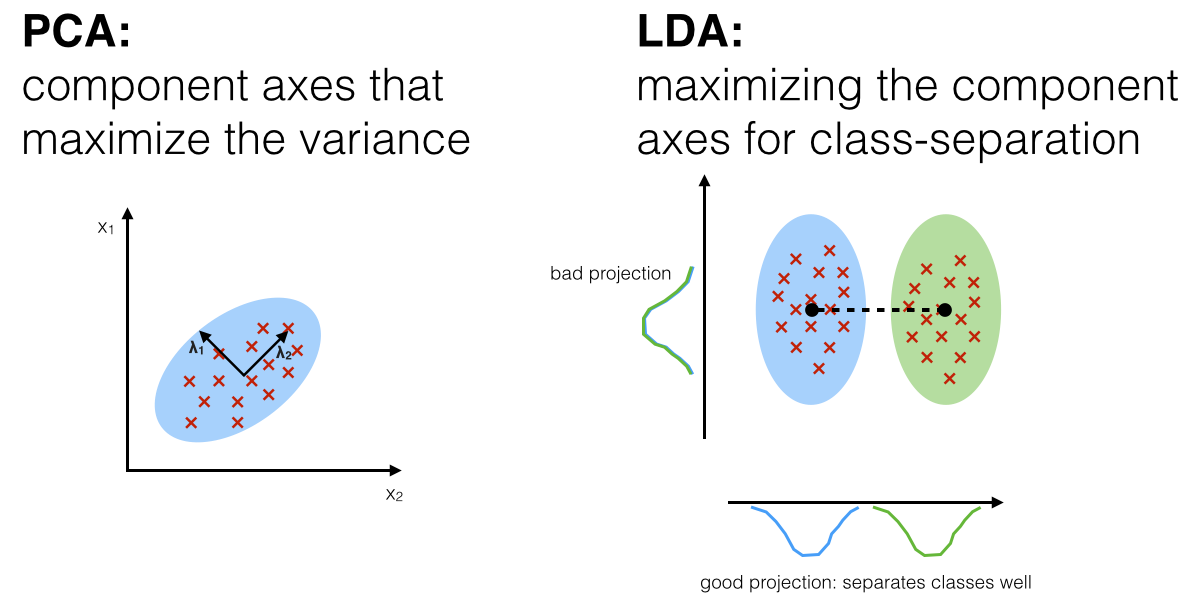

# 1. PCA as Noise Filtering:


        PCA can filter the noisy data by reconstruct the data using just the largest subset components and throwing out the noise.


Let's start by loading MNIST dataset and see how it looks. Then, we will plot several of the input noise-free data.


In [27]:
# Import digits-dataset from sklearn
digits = datasets.load_digits()
digits.data.shape

(1797, 64)

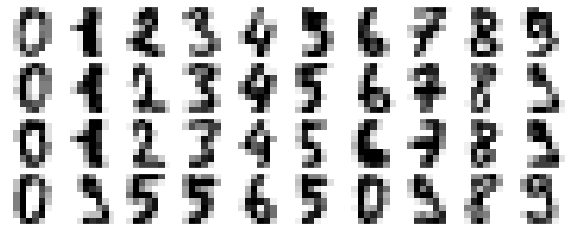

In [28]:
# Plot several of noise-free digit-data
plot_digits(digits.data)

### Adding noise to dataset:

Now lets add some random noise to create a noisy dataset, and re-plot it:



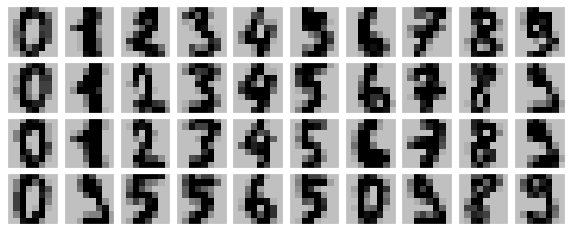

In [38]:
# Plot several of noisey digit-data (gaussian noise)
np.random.seed(42)
noise = np.random.normal(2, 4)
noisy = digits.data + noise
plot_digits(noisy)

### Choosing the number of components:

A vital part of using PCA is to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

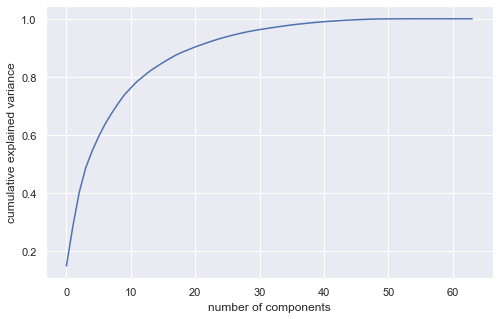

In [50]:
# Train the model on noisy data
pca = PCA().fit(noisy)

# Plot cumulative variance ratio vs. the number of components
plt.figure(figsize = (8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [55]:
# Train the model to preserve 50% of the variance
pca = PCA().fit(noisy)
pca.n_components_

64

- Preserving 50% of the variance amounts to 12 principal components.
- Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

(1797, 64)
(1797, 64)


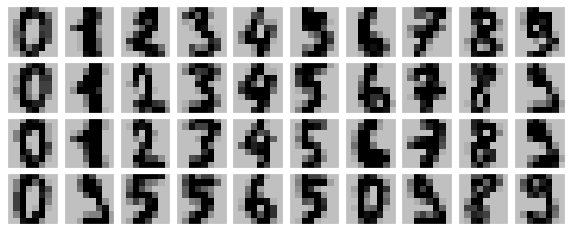

In [56]:
# Filtering the noisy data
components = pca.transform(noisy)
print(components.shape)

filtered = pca.inverse_transform(components)
print(filtered.shape)

plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine.

for ex: rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

---

# 2. Linear discriminant analysis:

 In Iris datasets w can find some of the features which are highly correlated <B>linearly dependent with other features</B>.
 
 These features contribute very less in predicting the output but increses the computational cost.

In [33]:
# Setup the Data
data = datasets.load_iris()
X, y = data.data, data.target

Let's train a LDA on the Iris dataset

In [34]:
# Train the model
lda = LDA(n_components = 2)
lda.fit(X, y)
X_projected = lda.transform(X)

In [35]:
# Shapes
print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


Now, we will plot projection onto the 2 first linear discriminant 

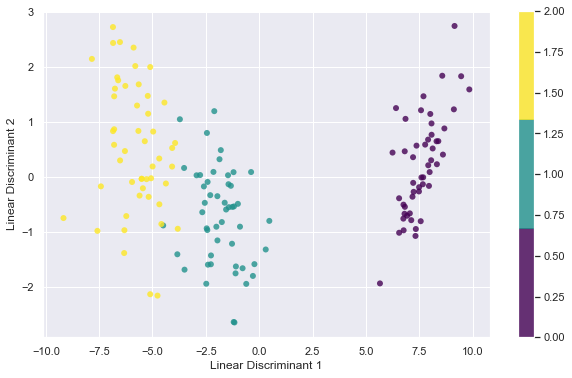

In [36]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

# Plot data after applying LDA
plt.figure(figsize = (10,6))
plt.scatter(x1, x2, c = y, edgecolor = "none",
            alpha = 0.8, cmap = plt.cm.get_cmap("viridis", 3))
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()

As we can see, the LDA gives us the axes that account for the most variance between the individual classes.